In [13]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import svm, metrics
from sklearn import datasets

In [1]:
digits = datasets.load_digits()

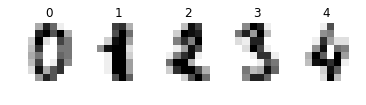

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

##print a few images to look at the dataset
images_number = 5
images_and_labels = list(zip(digits.images, digits.target))

for i, (image, label) in enumerate(images_and_labels[:images_number]):
    plt.subplot(2, images_number, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [3]:
## looking at one data point
print(digits.data[0])
digits.target[0]

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


0

In [4]:
samples_count = len(digits.images)
print("Number of samples: " + str(samples_count))

Number of samples: 1797


In [14]:
#split data into training, test, and blind sets.
train_data = digits.data[: int(0.7*samples_count)]
train_labels = digits.target[: int(0.7*samples_count)]

test_data = digits.data[int(0.7*samples_count): int(0.9*samples_count)]
test_labels = digits.target[int(0.7*samples_count): int(0.9*samples_count)]

blind_data = digits.data[int(0.9*samples_count): ]

print("Number of training records: " + str(len(train_data)))
print("Number of testing records : " + str(len(test_data)))
print("Number of blind records : " + str(len(score_data)))

Number of training records: 1257
Number of testing records : 360
Number of blind records : 180


In [20]:
## create the model and normalise the data points
clf = svm.SVC(kernel='rbf')
scaler = preprocessing.StandardScaler()
pipeline = Pipeline([('scaler', scaler), ('svc', clf)])
model = pipeline.fit(train_data, train_labels)

In [17]:
predicted = model.predict(test_data)
print("Result for each digit: \n\n%s" % metrics.classification_report(test_labels, predicted))

Result for each digit: 

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        37
          1       0.97      0.97      0.97        34
          2       1.00      0.97      0.99        36
          3       1.00      0.94      0.97        35
          4       0.78      0.97      0.87        37
          5       0.97      0.97      0.97        38
          6       0.97      0.86      0.91        36
          7       0.92      0.97      0.94        35
          8       0.91      0.89      0.90        35
          9       0.97      0.92      0.94        37

avg / total       0.95      0.94      0.95       360



In [19]:
predict_final = model.predict(blind_data)
print("Final Result (blind dataset): \n\n%s" % metrics.classification_report(test_labels, predicted))

Final Result (blind dataset): 

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        37
          1       0.97      0.97      0.97        34
          2       1.00      0.97      0.99        36
          3       1.00      0.94      0.97        35
          4       0.78      0.97      0.87        37
          5       0.97      0.97      0.97        38
          6       0.97      0.86      0.91        36
          7       0.92      0.97      0.94        35
          8       0.91      0.89      0.90        35
          9       0.97      0.92      0.94        37

avg / total       0.95      0.94      0.95       360

